In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors


In [3]:
"""
This is a program to analyse the results of the grid search performed over the parameters
of the Targeted_MA_DA simulations

The parameters varied are:
hidden_sizes=(50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200)
num_layers=(1 2 3 4 5 6 7 8 9 10)
learning_rates=(0.0001 0.0005 0.001 0.005 0.01 0.05 0.1)

The results for each combination are stored as a csv file in the folder
gridsearch_hidden_{}_layers_{}_lr_{}/Targeted_MA_DA_Biterror_Combinations.csv

Each csv file contains the following columns:
Alpha,Beta,BitError

The program will read all the csv files, create a summary csv file containing all the datapoints
the summary csv will have the columns:
hidden_size,num_layers,learning_rate,Alpha,Beta,BitError

It will then create plots of BitError for each combination of Alpha and Beta
Each combination of alpha beta will have a plot for BER vs hidden size, BER vs num_layers, and BER vs learning_rate with BER on the y axis
"""


# Define the parameter ranges
hidden_sizes = (50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150)#, 160, 170, 180, 190, 200)
num_layers = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
learning_rates = (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1)

# In case incomplete runs, we will check if the file exists before reading
base_path = 'grid_search_csv'
summary_data = []


In [4]:
for hidden_size in hidden_sizes:
    for num_layer in num_layers:
        for learning_rate in learning_rates:
            file_path = f"{base_path}/gridsearch_hidden_{hidden_size}_layers_{num_layer}_lr_{learning_rate}/Targeted_MA_DA_BitError_Combinations.csv"
            print(f"Checking for file: {file_path}")
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                print(f"File found. Reading data from {file_path}")
                for index, row in df.iterrows():
                    summary_data.append({
                        "hidden_size": hidden_size,
                        "num_layers": num_layer,
                        "learning_rate": learning_rate,
                        "Alpha": row["Alpha"],
                        "Beta": row["Beta"],
                        "BitError": row["BitError"]
                    })

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_data)

# filter out rows where alpha or beta is less than 0.6
summary_df = summary_df[(summary_df['Alpha'] >= 0.6) & (summary_df['Beta'] >= 0.6)]

summary_csv_path = f"{base_path}/gridsearch_summary.csv"

summary_df.to_csv(summary_csv_path, index=False)
print(f"Summary CSV saved to {summary_csv_path}")
print(summary_df)


Checking for file: grid_search_csv/gridsearch_hidden_50_layers_1_lr_0.0001/Targeted_MA_DA_BitError_Combinations.csv
File found. Reading data from grid_search_csv/gridsearch_hidden_50_layers_1_lr_0.0001/Targeted_MA_DA_BitError_Combinations.csv
Checking for file: grid_search_csv/gridsearch_hidden_50_layers_1_lr_0.0005/Targeted_MA_DA_BitError_Combinations.csv
File found. Reading data from grid_search_csv/gridsearch_hidden_50_layers_1_lr_0.0005/Targeted_MA_DA_BitError_Combinations.csv
Checking for file: grid_search_csv/gridsearch_hidden_50_layers_1_lr_0.001/Targeted_MA_DA_BitError_Combinations.csv
File found. Reading data from grid_search_csv/gridsearch_hidden_50_layers_1_lr_0.001/Targeted_MA_DA_BitError_Combinations.csv
Checking for file: grid_search_csv/gridsearch_hidden_50_layers_1_lr_0.005/Targeted_MA_DA_BitError_Combinations.csv
File found. Reading data from grid_search_csv/gridsearch_hidden_50_layers_1_lr_0.005/Targeted_MA_DA_BitError_Combinations.csv
Checking for file: grid_search_c

Alpha,Beta,hidden_size,num_layers,learning_rate,BitError
    Alpha  Beta  hidden_size  num_layers  learning_rate  BitError
0     0.6   0.6        150.0         3.0         0.0010  0.249001
1     0.6   0.7        100.0         1.0         0.0001  0.209659
2     0.6   0.8        100.0         2.0         0.0001  0.159772
3     0.6   0.9        150.0         1.0         0.0050  0.095070
4     0.7   0.6        120.0         1.0         0.0005  0.267081
5     0.7   0.7        140.0         1.0         0.0005  0.229633
6     0.7   0.8        150.0         1.0         0.0010  0.178696
7     0.7   0.9        150.0         1.0         0.0010  0.107097
8     0.8   0.6         70.0         1.0         0.0005  0.240771
9     0.8   0.7         70.0         1.0         0.0005  0.219627
10    0.8   0.8        140.0         2.0         0.0010  0.183423
11    0.8   0.9        140.0         1.0         0.0005  0.120616
12    0.9   0.6        120.0         5.0         0.0005  0.175499
13    0.9   0.7    

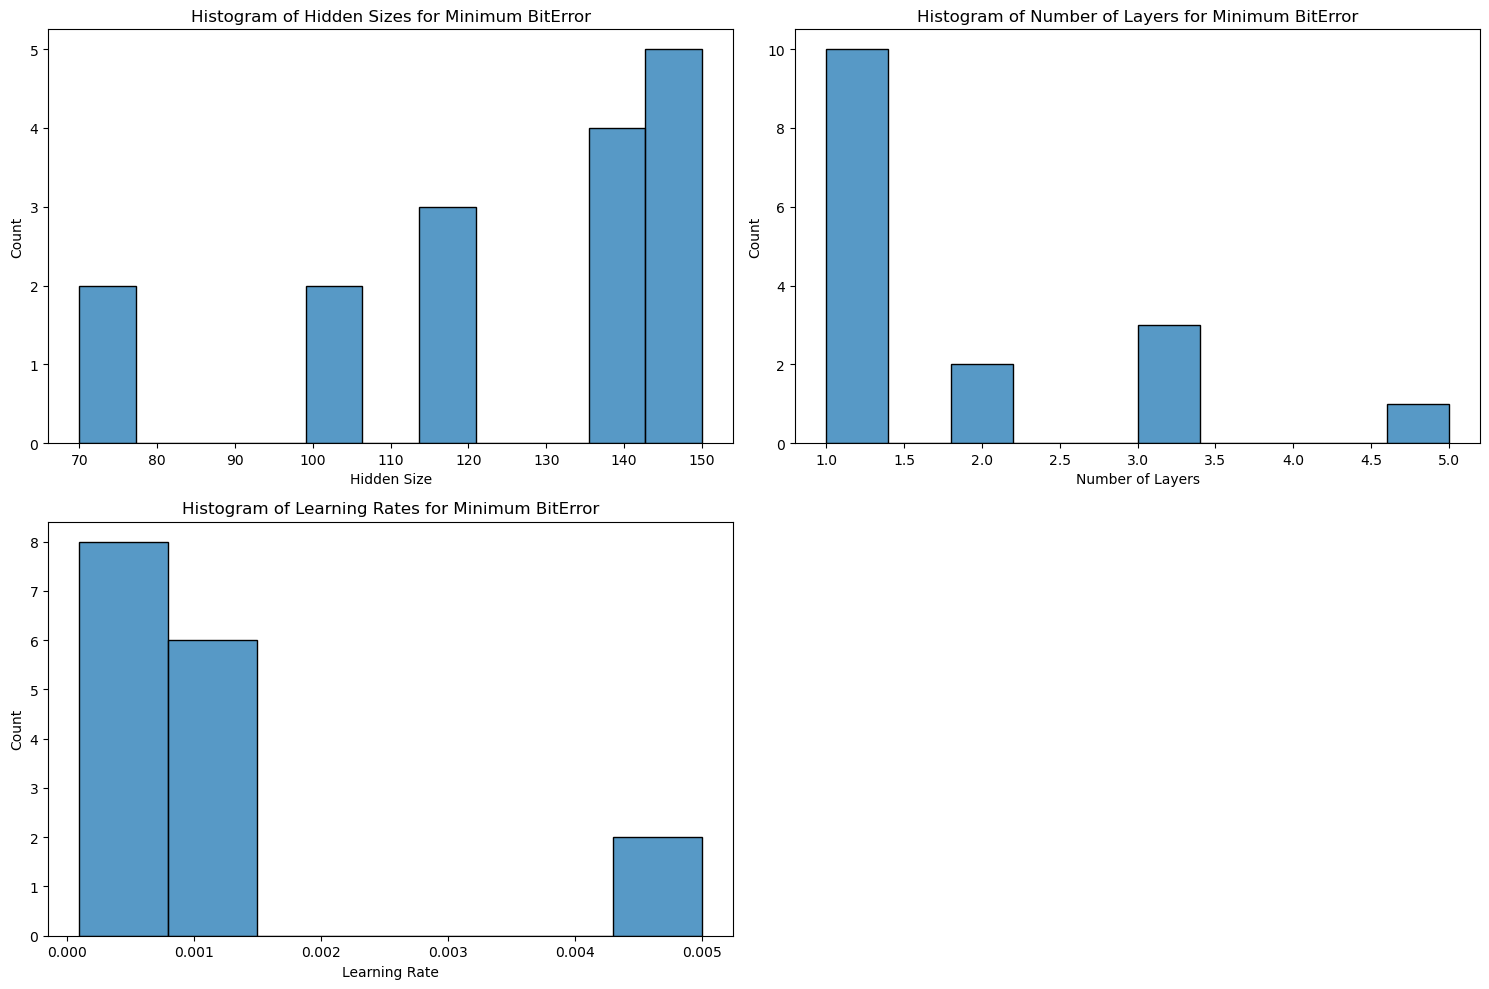

In [5]:
import numpy as np

print('Alpha,Beta,hidden_size,num_layers,learning_rate,BitError')
min_biterror_list = []
for alpha in summary_df['Alpha'].unique():
    for beta in summary_df['Beta'].unique():
        # find minimum bit error for this alpha beta and print it along with the parameters
        subset = summary_df[(summary_df['Alpha'] == alpha) & (summary_df['Beta'] == beta)]
        if subset.empty:
            continue
        min_row = subset.loc[subset['BitError'].idxmin()]
        # print results as a csv row
        # print(f"{alpha},{beta},{min_row['hidden_size']},{min_row['num_layers']},{min_row['learning_rate']},{min_row['BitError']}")
        min_biterror_list.append({
            'Alpha': alpha,
            'Beta': beta,
            'hidden_size': min_row['hidden_size'],
            'num_layers': min_row['num_layers'],
            'learning_rate': min_row['learning_rate'],
            'BitError': min_row['BitError']
        })
min_biterror_df = pd.DataFrame(min_biterror_list)
print(min_biterror_df)


# plot histogram of each parameter
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(min_biterror_df['hidden_size'], bins=len(hidden_sizes), kde=False)
plt.title('Histogram of Hidden Sizes for Minimum BitError')
plt.xlabel('Hidden Size')
plt.ylabel('Count')
plt.subplot(2, 2, 2)
sns.histplot(min_biterror_df['num_layers'], bins=len(num_layers), kde=False)
plt.title('Histogram of Number of Layers for Minimum BitError')
plt.xlabel('Number of Layers')
plt.ylabel('Count')
plt.subplot(2, 2, 3)
sns.histplot(min_biterror_df['learning_rate'], bins=len(learning_rates), kde=False)
plt.title('Histogram of Learning Rates for Minimum BitError')   
plt.xlabel('Learning Rate')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f"parameter_histograms.png")

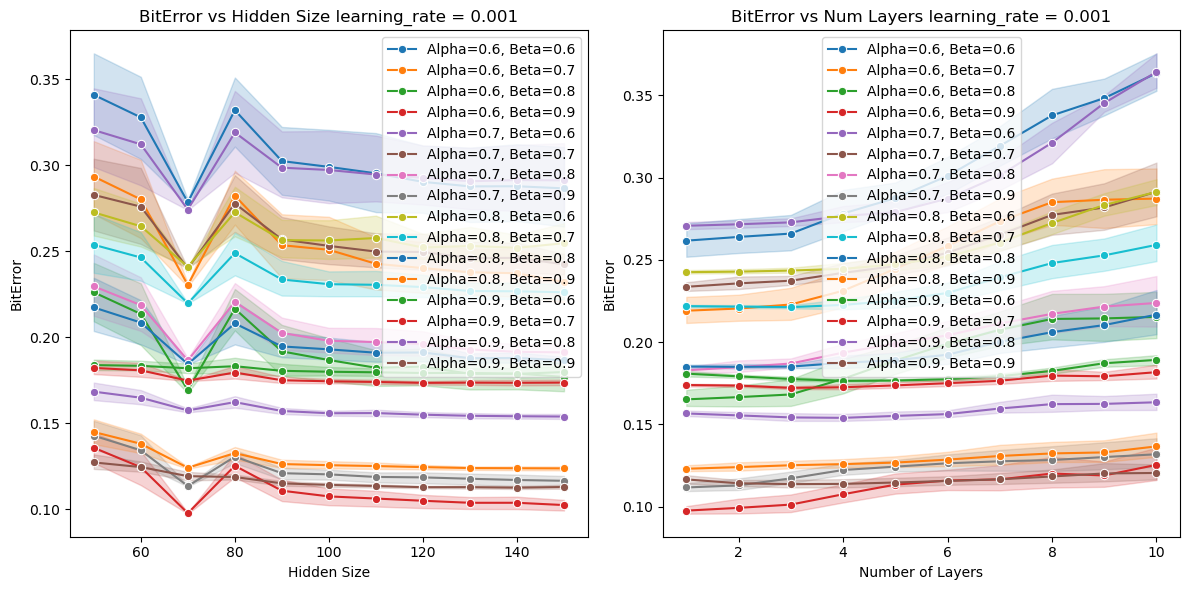

In [30]:
# use the alpha beta combination list for the remaining analysis on the main df
a_b_combos = []
for a in [0.6, 0.7, 0.8, 0.9]:
    for b in [0.6, 0.7, 0.8, 0.9]:
        a_b_combos.append((a, b))

# a_b_combos = [(0.9,0.6), (0.9,0.7), (0.9,0.8), (0.9,0.9)]
learning_rate = 0.001
# plot one figure with 2 subplots for number of layers and hidden size
# plot all combinations of alpha and beta in the same plot

plt.figure(figsize=(12, 6))
for i, (alpha, beta) in enumerate(a_b_combos):
    subset = summary_df[(summary_df['Alpha'] == alpha) & (summary_df['Beta'] == beta) & (summary_df['learning_rate'] == learning_rate)]
    if subset.empty:
        continue
    plt.subplot(1, 2, 1)
    sns.lineplot(data=subset, x='hidden_size', y='BitError', marker='o', label=f'Alpha={alpha}, Beta={beta}')
    plt.title(f'BitError vs Hidden Size learning_rate = {learning_rate}')
    plt.xlabel('Hidden Size')
    plt.ylabel('BitError')
    plt.subplot(1, 2, 2)
    sns.lineplot(data=subset, x='num_layers', y='BitError', marker='o', label=f'Alpha={alpha}, Beta={beta}')
    plt.title(f'BitError vs Num Layers learning_rate = {learning_rate}')
    plt.xlabel('Number of Layers')
    plt.ylabel('BitError')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"BitError_plots_lr_{learning_rate}.png")

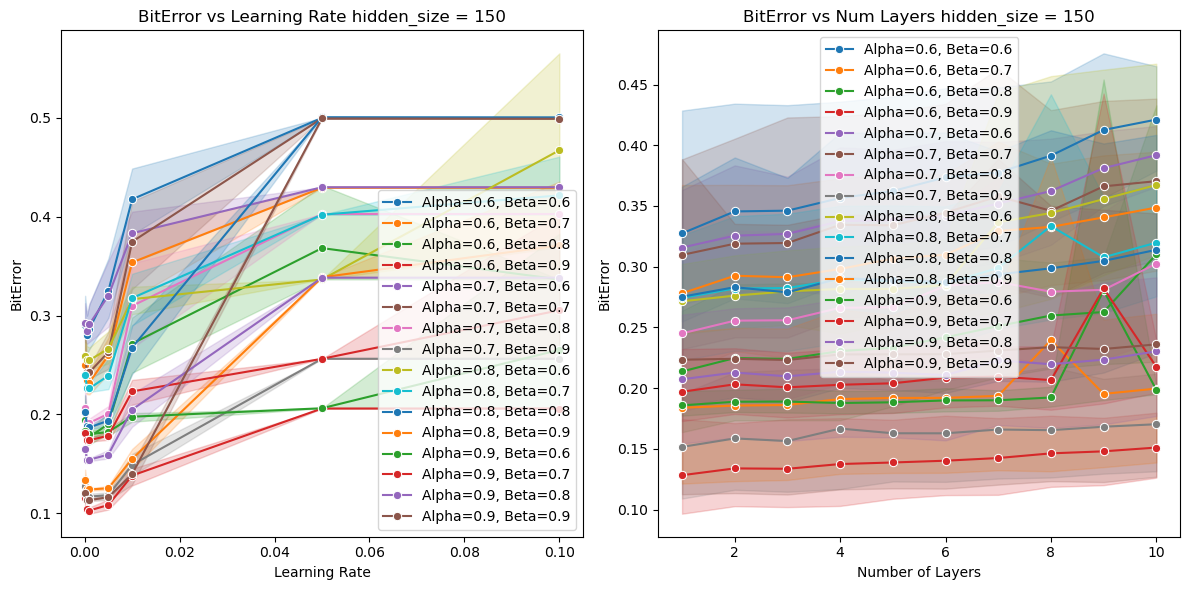

In [31]:
# use the alpha beta combination list for the remaining analysis on the main df
a_b_combos = []
for a in [0.6, 0.7, 0.8, 0.9]:
    for b in [0.6, 0.7, 0.8, 0.9]:
        a_b_combos.append((a, b))

# a_b_combos = [(0.9,0.6), (0.9,0.7), (0.9,0.8), (0.9,0.9)]
hidden_size = 150
# plot one figure with 2 subplots for number of layers and hidden size
# plot all combinations of alpha and beta in the same plot

plt.figure(figsize=(12, 6))
for i, (alpha, beta) in enumerate(a_b_combos):
    subset = summary_df[(summary_df['Alpha'] == alpha) & (summary_df['Beta'] == beta) & (summary_df['hidden_size'] == hidden_size)]
    if subset.empty:
        continue
    plt.subplot(1, 2, 1)
    sns.lineplot(data=subset, x='learning_rate', y='BitError', marker='o', label=f'Alpha={alpha}, Beta={beta}')
    plt.title(f'BitError vs Learning Rate hidden_size = {hidden_size}')
    plt.xlabel('Learning Rate')
    plt.ylabel('BitError')
    plt.subplot(1, 2, 2)
    sns.lineplot(data=subset, x='num_layers', y='BitError', marker='o', label=f'Alpha={alpha}, Beta={beta}')
    plt.title(f'BitError vs Num Layers hidden_size = {hidden_size}')
    plt.xlabel('Number of Layers')
    plt.ylabel('BitError')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"BitError_plots_hidden_size_{hidden_size}.png")


Overall Mean BitError by Hidden Size (averaged over all Alpha-Beta combinations, learning_rate=0.001):
 hidden_size  Mean_BitError
          50       0.194428
          60       0.188108
          70       0.168980
          80       0.186657
          90       0.175896
         100       0.174016
         110       0.172987
         120       0.172350
         130       0.170791
         140       0.170486
         150       0.169789

Overall Mean BitError by Number of Layers (averaged over all Alpha-Beta combinations, learning_rate=0.001):
 num_layers  Mean_BitError
          1       0.167328
          2       0.167541
          3       0.168199
          4       0.170540
          5       0.172767
          6       0.175909
          7       0.180862
          8       0.185584
          9       0.188022
         10       0.191765


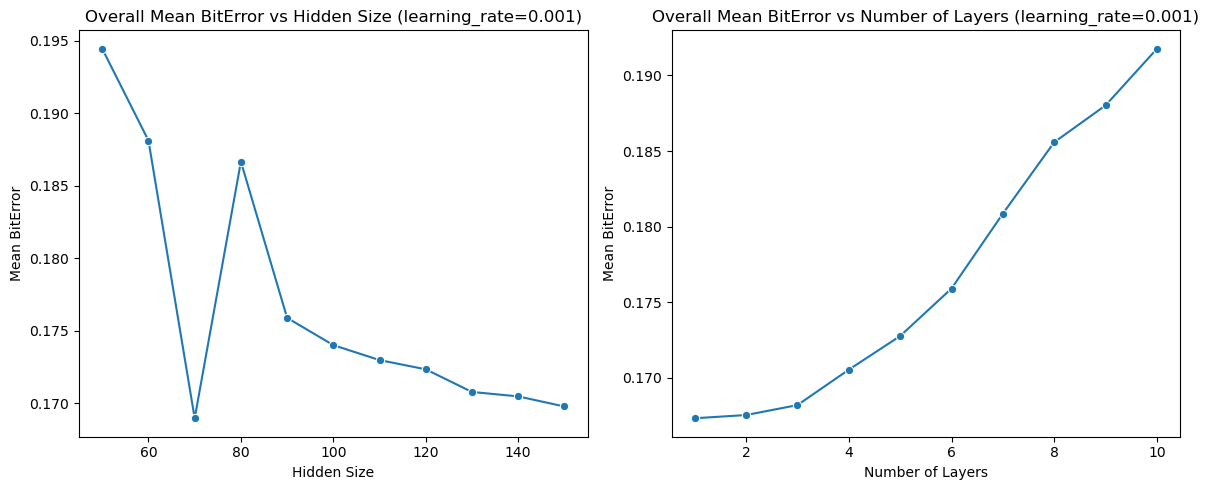

In [32]:
# Filter data for all alpha-beta combinations with Alpha, Beta > 0.6 and selected learning rate
combined_df = summary_df[
    (summary_df['Alpha'] > 0.6) &
    (summary_df['Beta'] > 0.6) &
    (summary_df['learning_rate'] == learning_rate)
]

# Mean BitError for each hidden size
mean_by_hidden = combined_df.groupby('hidden_size', as_index=False)['BitError'].mean()
mean_by_hidden = mean_by_hidden.rename(columns={'BitError': 'Mean_BitError'})

# Mean BitError for each number of layers
mean_by_layers = combined_df.groupby('num_layers', as_index=False)['BitError'].mean()
mean_by_layers = mean_by_layers.rename(columns={'BitError': 'Mean_BitError'})

# Print both tables
print(f"\nOverall Mean BitError by Hidden Size (averaged over all Alpha-Beta combinations, learning_rate={learning_rate}):")
print(mean_by_hidden.to_string(index=False))

print(f"\nOverall Mean BitError by Number of Layers (averaged over all Alpha-Beta combinations, learning_rate={learning_rate}):")
print(mean_by_layers.to_string(index=False))


# plot both tables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=mean_by_hidden, x='hidden_size', y='Mean_BitError', marker='o')
plt.title(f'Overall Mean BitError vs Hidden Size (learning_rate={learning_rate})')
plt.xlabel('Hidden Size')
plt.ylabel('Mean BitError')
plt.subplot(1, 2, 2)
sns.lineplot(data=mean_by_layers, x='num_layers', y='Mean_BitError', marker='o')
plt.title(f'Overall Mean BitError vs Number of Layers (learning_rate={learning_rate})')
plt.xlabel('Number of Layers') 
plt.ylabel('Mean BitError')
plt.tight_layout()
plt.savefig(f"Overall_Mean_BitError_lr_{learning_rate}.png")



Mean BitError vs Learning Rate (hidden_size=150, num_layers=5):
 learning_rate  Mean_BitError
        0.0001       0.186412
        0.0005       0.184883
        0.0010       0.187117
        0.0050       0.194102
        0.0100       0.266424
        0.0500       0.371176
        0.1000       0.371133

Mean BitError vs Hidden Size (num_layers=5, learning_rate=0.001):
 hidden_size  Mean_BitError
          50       0.211856
          60       0.205611
          80       0.193615
          90       0.191508
         100       0.190329
         110       0.188938
         120       0.188527
         130       0.187661
         140       0.187674
         150       0.187117

Mean BitError vs Num Layers (hidden_size=150, learning_rate=0.001):
 num_layers  Mean_BitError
          1       0.180385
          2       0.180536
          3       0.180839
          4       0.183113
          5       0.187117
          6       0.189943
          7       0.194157
          8       0.198418
        

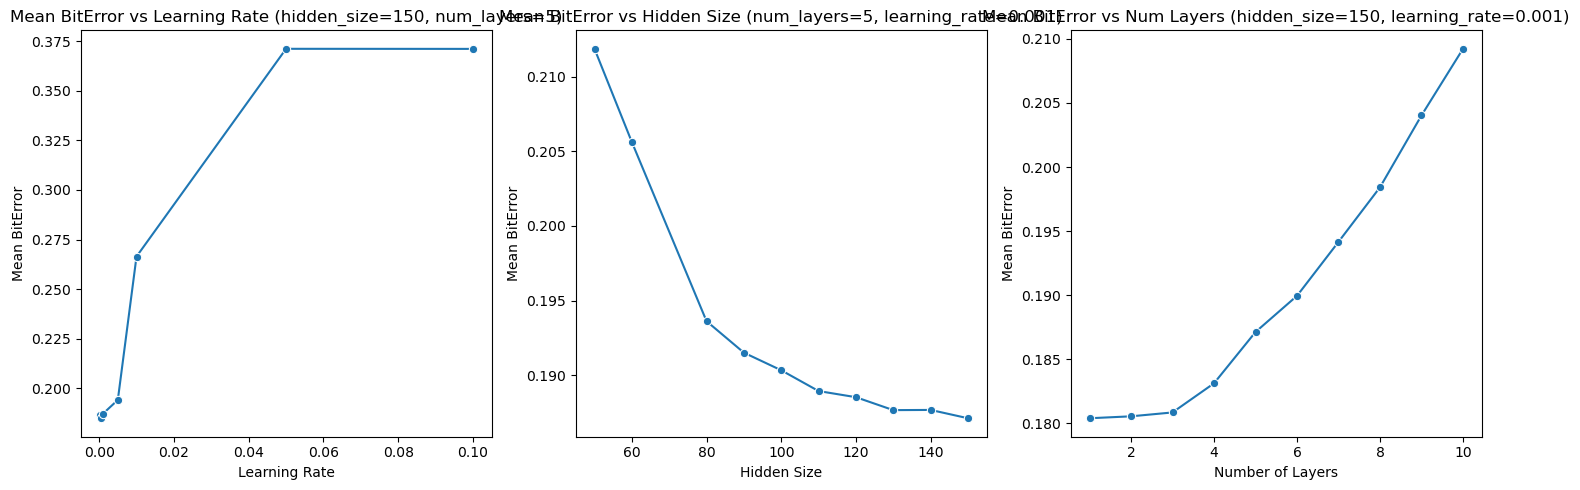

In [6]:
# Here we Try an alternative approach.
# we use the parameters that we used for our simulations
# i.e. hidden_size = 150, num_layers = 5, learning_rate = 0.001
# then for for fixed hidden size and num layers, we plot the mean BitError vs learning rate
# we do the same for the other parameters and study the variation of mean BitError with each parameter
# as we primarily look for the region alpha and beta > 0.6, we filter the data accordingly (already done before creating the summary df)
fixed_hidden_size = 150
fixed_num_layers = 5
fixed_learning_rate = 0.001

# Mean BitError vs Learning Rate for fixed hidden size and num layers
subset_lr = summary_df[
    (summary_df['hidden_size'] == fixed_hidden_size) &
    (summary_df['num_layers'] == fixed_num_layers)
]
mean_by_lr = subset_lr.groupby('learning_rate', as_index=False)['BitError'].mean()
mean_by_lr = mean_by_lr.rename(columns={'BitError': 'Mean_BitError'})  
# Mean BitError vs Hidden Size for fixed num layers and learning rate
subset_hs = summary_df[
    (summary_df['num_layers'] == fixed_num_layers) &
    (summary_df['learning_rate'] == fixed_learning_rate)
]
mean_by_hs = subset_hs.groupby('hidden_size', as_index=False)['BitError'].mean()
mean_by_hs = mean_by_hs.rename(columns={'BitError': 'Mean_BitError'})
# Mean BitError vs Num Layers for fixed hidden size and learning rate
subset_nl = summary_df[
    (summary_df['hidden_size'] == fixed_hidden_size) &
    (summary_df['learning_rate'] == fixed_learning_rate)
]
mean_by_nl = subset_nl.groupby('num_layers', as_index=False)['BitError'].mean()
mean_by_nl = mean_by_nl.rename(columns={'BitError': 'Mean_BitError'})
# Print the tables
print(f"\nMean BitError vs Learning Rate (hidden_size={fixed_hidden_size}, num_layers={fixed_num_layers}):")
print(mean_by_lr.to_string(index=False))    
print(f"\nMean BitError vs Hidden Size (num_layers={fixed_num_layers}, learning_rate={fixed_learning_rate}):")
print(mean_by_hs.to_string(index=False))
print(f"\nMean BitError vs Num Layers (hidden_size={fixed_hidden_size}, learning_rate={fixed_learning_rate}):")
print(mean_by_nl.to_string(index=False))
# Plot the tables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.lineplot(data=mean_by_lr, x='learning_rate', y='Mean_BitError', marker='o')
plt.title(f'Mean BitError vs Learning Rate (hidden_size={fixed_hidden_size}, num_layers={fixed_num_layers})')
plt.xlabel('Learning Rate')
plt.ylabel('Mean BitError')
plt.subplot(1, 3, 2)
sns.lineplot(data=mean_by_hs, x='hidden_size', y='Mean_BitError', marker='o')
plt.title(f'Mean BitError vs Hidden Size (num_layers={fixed_num_layers}, learning_rate={fixed_learning_rate})')
plt.xlabel('Hidden Size')
plt.ylabel('Mean BitError')
plt.subplot(1, 3, 3)
sns.lineplot(data=mean_by_nl, x='num_layers', y='Mean_BitError', marker='o')
plt.title(f'Mean BitError vs Num Layers (hidden_size={fixed_hidden_size}, learning_rate={fixed_learning_rate})')
plt.xlabel('Number of Layers')
plt.ylabel('Mean BitError')
plt.tight_layout()
plt.savefig(f"Mean_BitError_fixed_params.png")




In [ ]:

# Create output directory for plots
plots_dir = f"{base_path}/gridsearch_plots"
os.makedirs(plots_dir, exist_ok=True)   

os.makedirs(f"{plots_dir}/BERvsHidden", exist_ok=True)
os.makedirs(f"{plots_dir}/BERvsNumLayers", exist_ok=True)
os.makedirs(f"{plots_dir}/BERvsLearningRate", exist_ok=True)

print(f"Plots will be saved to {plots_dir}")
# Create plots for each combination of Alpha and Beta
unique_alphas = summary_df['Alpha'].unique()
unique_betas = summary_df['Beta'].unique() 

# for alpha in unique_alphas:
#     for beta in unique_betas:
#         subset = summary_df[(summary_df['Alpha'] == alpha) & (summary_df['Beta'] == beta)]
        
#         if subset.empty:
#             print(f"No data for Alpha={alpha}, Beta={beta}. Skipping plots.")
#             continue
        
#         # Plot BitError vs hidden_size
#         plt.figure(figsize=(10, 6))
#         sns.lineplot(data=subset, x='hidden_size', y='BitError', marker='o')
#         plt.title(f'BitError vs Hidden Size (Alpha={alpha}, Beta={beta})')
#         plt.xlabel('Hidden Size')
#         plt.ylabel('BitError')
#         plt.grid(True)
#         plt.savefig(f"{plots_dir}/BERvsHidden/BitError_vs_HiddenSize_Alpha_{alpha}_Beta_{beta}.png")
#         plt.close()
        
#         # Plot BitError vs num_layers
#         plt.figure(figsize=(10, 6))
#         sns.lineplot(data=subset, x='num_layers', y='BitError', marker='o')
#         plt.title(f'BitError vs Num Layers (Alpha={alpha}, Beta={beta})')
#         plt.xlabel('Num Layers')
#         plt.ylabel('BitError')
#         plt.grid(True)
#         plt.savefig(f"{plots_dir}/BERvsNumLayers/BitError_vs_NumLayers_Alpha_{alpha}_Beta_{beta}.png")
#         plt.close()
        
#         # Plot BitError vs learning_rate
#         plt.figure(figsize=(10, 6))
#         sns.lineplot(data=subset, x='learning_rate', y='BitError', marker='o')
#         plt.xscale('log')
#         plt.title(f'BitError vs Learning Rate (Alpha={alpha}, Beta={beta})')
#         plt.xlabel('Learning Rate')
#         plt.ylabel('BitError')
#         plt.grid(True)
#         plt.savefig(f"{plots_dir}/BERvsLearningRate/BitError_vs_LearningRate_Alpha_{alpha}_Beta_{beta}.png")
#         plt.close()
#         print(f"Plots saved for Alpha={alpha}, Beta={beta}")
    
# print("All plots generated.")

# # For each alpha beta combination, create a 3d surface plot of BitError vs hidden_size and num_layers for a fixed learning rate
# from mpl_toolkits.mplot3d import Axes3D
# os.makedirs(f"{plots_dir}/BER_Surface", exist_ok=True)

# for lr in learning_rates:
#     os.makedirs(f"{plots_dir}/BER_Surface/LR{lr}", exist_ok=True)
#     for alpha in unique_alphas:
#         for beta in unique_betas:
#             subset = summary_df[(summary_df['Alpha'] == alpha) & (summary_df['Beta'] == beta) & (summary_df['learning_rate'] == lr)]
            
#             if subset.empty:
#                 print(f"No data for Alpha={alpha}, Beta={beta}, Learning Rate={lr}. Skipping 3D plot.")
#                 continue
            
#             fig = plt.figure(figsize=(10, 7))
#             ax = fig.add_subplot(111, projection='3d')
            
#             # Create a meshgrid for hidden_size and num_layers
#             hidden_size_grid, num_layers_grid = np.meshgrid(
#                 np.sort(subset['hidden_size'].unique()), 
#                 np.sort(subset['num_layers'].unique())
#             )
#             biterror_grid = np.zeros(hidden_size_grid.shape)
            
#             for i in range(hidden_size_grid.shape[0]):
#                 for j in range(hidden_size_grid.shape[1]):
#                     hs = hidden_size_grid[i, j]
#                     nl = num_layers_grid[i, j]
#                     be_row = subset[(subset['hidden_size'] == hs) & (subset['num_layers'] == nl)]
#                     if not be_row.empty:
#                         biterror_grid[i, j] = be_row['BitError'].values[0]
#                     else:
#                         biterror_grid[i, j] = np.nan  # or some default value
            
#             ax.plot_surface(hidden_size_grid, num_layers_grid, biterror_grid, cmap='viridis')
#             ax.set_title(f'BitError Surface (Alpha={alpha}, Beta={beta}, LR={lr})')
#             ax.set_xlabel('Hidden Size')
#             ax.set_ylabel('Num Layers')
#             ax.set_zlabel('BitError')
#             plt.savefig(f"{plots_dir}/BER_Surface/LR{lr}/BitError_Surface_Alpha_{alpha}_Beta_{beta}_LR_{lr}.png")
#             plt.close()
#             print(f"3D Surface plot saved for Alpha={alpha}, Beta={beta}, Learning Rate={lr}")



# Plot the contour plots for each combination of Alpha and Beta at a fixed learning rate

os.makedirs(f"{plots_dir}/BER_Contour", exist_ok=True)
for lr in learning_rates:
# for lr in [0.001]:
    os.makedirs(f"{plots_dir}/BER_Contour/LR{lr}", exist_ok=True)
    # --- Individual contour plots ---
    for alpha in unique_alphas:
        for beta in unique_betas:
            subset = summary_df[(summary_df['Alpha'] == alpha) & (summary_df['Beta'] == beta) & (summary_df['learning_rate'] == lr)]
            
            if subset.empty:
                print(f"No data for Alpha={alpha}, Beta={beta}, Learning Rate={lr}. Skipping contour plot.")
                continue
            
            plt.figure(figsize=(10, 7))
            pivot_table = subset.pivot(index='num_layers', columns='hidden_size', values='BitError')
            X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
            Z = pivot_table.values
            
            cp = plt.contourf(X, Y, Z, cmap='viridis', vmin=0, vmax=0.35)
            cbar = plt.colorbar(cp)
            plt.title(f'BitError Contour (Alpha={alpha}, Beta={beta}, LR={lr})')
            plt.xlabel('Hidden Size')
            plt.ylabel('Num Layers')
            plt.savefig(f"{plots_dir}/BER_Contour/LR{lr}/BitError_Contour_Alpha_{alpha}_Beta_{beta}_LR_{lr}.png")
            plt.close()
            print(f"Contour plot saved for Alpha={alpha}, Beta={beta}, Learning Rate={lr}")

    # --- Efficient 9x9 matrix plot ---
    os.makedirs(f"{plots_dir}/BER_Contour_Matrix", exist_ok=True)
    matrix_plot_path = f"{plots_dir}/BER_Contour_Matrix/BitError_Contour_Matrix_LR_{lr}.png"
    fig, axes = plt.subplots(9, 9, figsize=(30, 30))
    fig.suptitle(f'BitError Contour Matrix (Learning Rate={lr})', fontsize=24)
    cp = None  # To store the last contourf for colorbar

    sorted_alphas = sorted(unique_alphas)[:9]
    sorted_betas = sorted(unique_betas)[:9]
    norm = colors.Normalize(vmin=0, vmax=0.35)
    for i, alpha in enumerate(sorted_alphas):
        for j, beta in enumerate(sorted_betas):
            ax = axes[i, j]
            subset = summary_df[(summary_df['Alpha'] == alpha) & (summary_df['Beta'] == beta) & (summary_df['learning_rate'] == lr)]
            
            if subset.empty:
                ax.set_title(f'Alpha={alpha}, Beta={beta}\nNo Data', fontsize=10)
                ax.axis('off')
                continue
            
            pivot_table = subset.pivot(index='num_layers', columns='hidden_size', values='BitError')
            X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
            Z = pivot_table.values
            
            cp = ax.contourf(X, Y, Z, cmap='viridis', norm=norm)
            ax.set_title(f'Alpha={alpha}, Beta={beta}', fontsize=10)
            ax.set_xlabel('Hidden Size', fontsize=8)
            ax.set_ylabel('Num Layers', fontsize=8)
            ax.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    if cp is not None:
        cbar = fig.colorbar(cp, ax=axes.ravel().tolist(), shrink=0.95)
        cbar.set_label('BitError', fontsize=16)
    plt.savefig(matrix_plot_path)
    plt.close()
    print(f"Contour matrix plot saved for Learning Rate={lr} at {matrix_plot_path}")